<hr>
# Setting Up

In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "hepatitis-c-virus-hcv-for-egyptian-patients"

In [2]:
library(pacman)
pacman::p_load(pacman, rio)
require(gridExtra)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




<hr>
# Importing CSV Files

In [3]:
df = import("../input/hepatitis-c-virus-hcv-for-egyptian-patients/HCV-Egy-Data.csv")
df_or = df
df_disc = import("../input/hepatitis-c-virus-hcv-for-egyptian-patients/Discretization-Criteria.csv")
head(df_or)
df_disc

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,⋯,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,56,1,35,2,1,1,1,2,2,2,⋯,5,5,5,655330,634536,288194,5,5,13,2
2,46,1,29,1,2,2,1,2,2,1,⋯,57,123,44,40620,538635,637056,336804,31085,4,2
3,57,1,33,2,2,2,2,1,1,1,⋯,5,5,5,571148,661346,5,735945,558829,4,4
4,49,2,33,1,2,1,2,1,2,1,⋯,48,77,33,1041941,449939,585688,744463,582301,10,3
5,59,1,32,1,1,2,1,2,2,2,⋯,94,90,30,660410,738756,3731527,338946,242861,11,1
6,58,2,22,2,2,2,1,2,2,1,⋯,73,114,29,1157452,1086852,5,5,5,4,4


,Feature Names,Feature Values,Discretization (Items)
,<chr>,<chr>,<chr>
1,Age,32:61,"[0; 32], ]32; 37], ]37; 42],]42; 47], ]47; 52], ]52; 57],]57; 62]"
2,Gender,"Male,Female","[Male], [Female]"
3,BMI(Body Mass Index),22:35,"[0; 18:5[ [18:5; 25[, [25; 30[, [30; 35[, [35; 40["
4,Fever,"Absent, Present","[Absent], [Present] -"
5,Nausea/Vomiting,"Absent, Present","[Absent], [Present] -"
6,Headache,"Absent, Present","[Absent], [Present] -"
7,Diarrhea,"Absent, Present","[Absent], [Present] -"
8,Fatigue,"Absent, Present","[Absent], [Present] -"
9,Bone ache,"Absent, Present","[Absent], [Present] -"


<hr>
# Data Cleaning

Discretised Data as per expert guided **discretization criteria** dataset

In [4]:
df$Age <- cut(df$Age, breaks=c(0, 32, 37, 42, 47, 52, 57, 62), include.lowest=TRUE)
df$Gender <- factor(df$Gender, labels=c("Male", "Female"))
df$BMI <- cut(df$BMI, breaks=c(0, 18.5, 25, 30, 35, 40), include.lowest=TRUE, right=FALSE)

for (x in colnames(df[4:10])){
    df[[x]] <- factor(df[[x]], levels=c(1, 2), labels=c("Absent", "Present"))
}

df$WBC <- cut(df$WBC, breaks=c(0, 4000, 11000, 12101), include.lowest=TRUE, right=FALSE)
df$RBC <- cut(df$RBC, breaks=c(0, 3000000, 5000000, 5018451), include.lowest=TRUE, right=FALSE)

hgb_v <- vector()
for(x in (1:1385)){
    if(df[x,]$Gender == "Male"){
        if(df[x,]$HGB >= 2 & df[x,]$HGB < 14){ hgb_v[x] = as.character("[2,14)")}
        else if(df[x,]$HGB >= 14 & df[x,]$HGB <= 17.5){ hgb_v[x] = as.character("[14,17.5]")}
        else{ df[x,]$HGB = as.character("(17.5,20]")}
    } else {
        if(df[x,]$HGB >= 2 & df[x,]$HGB < 12.3){ hgb_v[x] = as.character("[2,12.3)")}
        else if(df[x,]$HGB >= 12.3 & df[x,]$HGB <= 15.3){ hgb_v[x] = as.character("[12.3, 15.3]")}
        else{ df[x,]$HGB = as.character("(15.3, 20]")}
    }
}
df$HGB <- factor(hgb_v)

df$Plat <- cut(df$Plat, breaks=c(93013, 100000, 255000, 226465), include.lowest=TRUE, right=FALSE)

for (x in colnames(df[15:22])){
    df[[x]] <- cut(df[[x]], breaks=c(0, 20, 40, 128), include.lowest=TRUE, right=TRUE)
}

df["RNA Base"] <- cut(df[["RNA Base"]], breaks=c(0, 5, 1201086), include.lowest=TRUE, right=TRUE)
df["RNA 4"] <- cut(df[["RNA 4"]], breaks=c(0, 5, 1201715), include.lowest=TRUE, right=TRUE)
df["RNA 12"] <- cut(df[["RNA 12"]], breaks=c(0, 5, 3731527), include.lowest=TRUE, right=TRUE)
df["RNA EOT"] <- cut(df[["RNA EOT"]], breaks=c(0, 5, 808450), include.lowest=TRUE, right=TRUE)
df["RNA EF"] <- cut(df[["RNA EF"]], breaks=c(0, 5, 808450), include.lowest=TRUE, right=TRUE)
df[["Baseline histological Grading"]] <- as.factor(df[["Baseline histological Grading"]])
df[["Baselinehistological staging"]] <- factor(df[["Baselinehistological staging"]], levels=c(0, 1, 2, 3, 4), labels=c("[No Fibrosis]", "[Portal Fibrosis]", "[Few Septa]", "[Many Septa]", "[Cirrhosis]"))
head(df)

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,⋯,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,"(52,57]",Male,"[35,40]",Present,Absent,Absent,Absent,Present,Present,Present,⋯,"[0,20]","[0,20]","[0,20]","(5,1.2e+06]","(5,1.2e+06]","(5,3.73e+06]","[0,5]","[0,5]",13,[Few Septa]
2,"(42,47]",Male,"[25,30)",Absent,Present,Present,Absent,Present,Present,Absent,⋯,"(40,128]","(40,128]","(40,128]","(5,1.2e+06]","(5,1.2e+06]","(5,3.73e+06]","(5,8.08e+05]","(5,8.08e+05]",4,[Few Septa]
3,"(52,57]",Male,"[30,35)",Present,Present,Present,Present,Absent,Absent,Absent,⋯,"[0,20]","[0,20]","[0,20]","(5,1.2e+06]","(5,1.2e+06]","[0,5]","(5,8.08e+05]","(5,8.08e+05]",4,[Cirrhosis]
4,"(47,52]",Female,"[30,35)",Absent,Present,Absent,Present,Absent,Present,Absent,⋯,"(40,128]","(40,128]","(20,40]","(5,1.2e+06]","(5,1.2e+06]","(5,3.73e+06]","(5,8.08e+05]","(5,8.08e+05]",10,[Many Septa]
5,"(57,62]",Male,"[30,35)",Absent,Absent,Present,Absent,Present,Present,Present,⋯,"(40,128]","(40,128]","(20,40]","(5,1.2e+06]","(5,1.2e+06]","(5,3.73e+06]","(5,8.08e+05]","(5,8.08e+05]",11,[Portal Fibrosis]
6,"(57,62]",Female,"[18.5,25)",Present,Present,Present,Absent,Present,Present,Absent,⋯,"(40,128]","(40,128]","(20,40]","(5,1.2e+06]","(5,1.2e+06]","[0,5]","[0,5]","[0,5]",4,[Cirrhosis]


In [5]:
#export(df, "HCV-Discretised.csv")

<hr>
# Exploration

In [6]:
summary(df)

      Age         Gender           BMI          Fever     Nausea/Vomting
 [0,32] : 50   Male  :707   [0,18.5) :  0   Absent :671   Absent :689   
 (32,37]:245   Female:678   [18.5,25):305   Present:714   Present:696   
 (37,42]:227                [25,30)  :469                               
 (42,47]:228                [30,35)  :511                               
 (47,52]:212                [35,40]  :100                               
 (52,57]:243                                                            
 (57,62]:180                                                            
    Headache      Diarrhea   Fatigue & generalized bone ache    Jaundice  
 Absent :698   Absent :689   Absent :694                     Absent :691  
 Present:687   Present:696   Present:691                     Present:694  
                                                                          
                                                                          
                                         

In [7]:
summary(df_or)

      Age            Gender          BMI            Fever       Nausea/Vomting 
 Min.   :32.00   Min.   :1.00   Min.   :22.00   Min.   :1.000   Min.   :1.000  
 1st Qu.:39.00   1st Qu.:1.00   1st Qu.:25.00   1st Qu.:1.000   1st Qu.:1.000  
 Median :46.00   Median :1.00   Median :29.00   Median :2.000   Median :2.000  
 Mean   :46.32   Mean   :1.49   Mean   :28.61   Mean   :1.516   Mean   :1.503  
 3rd Qu.:54.00   3rd Qu.:2.00   3rd Qu.:32.00   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :61.00   Max.   :2.00   Max.   :35.00   Max.   :2.000   Max.   :2.000  
    Headache        Diarrhea     Fatigue & generalized bone ache
 Min.   :1.000   Min.   :1.000   Min.   :1.000                  
 1st Qu.:1.000   1st Qu.:1.000   1st Qu.:1.000                  
 Median :1.000   Median :2.000   Median :1.000                  
 Mean   :1.496   Mean   :1.503   Mean   :1.499                  
 3rd Qu.:2.000   3rd Qu.:2.000   3rd Qu.:2.000                  
 Max.   :2.000   Max.   :2.000   Max.   :2.000    

<hr>
<h2>Analyzing ALT Levels</h2>
Analyzing effect on ALT Levels across various Demograhics for different time periods

In [8]:
data_ex <- df[1:10]
for (x in (11:27)) {
    data_ex[colnames(df_or)[x]] <- df_or[colnames(df_or)[x]]
}
data_ex["BaselineHistologicalGrading"] <- df["Baseline histological Grading"]
data_ex["BaselineHistologicalStaging"] <- df["Baselinehistological staging"]
head(data_ex)

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,⋯,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,BaselineHistologicalGrading,BaselineHistologicalStaging
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,"(52,57]",Male,"[35,40]",Present,Absent,Absent,Absent,Present,Present,Present,⋯,5,5,5,655330,634536,288194,5,5,13,[Few Septa]
2,"(42,47]",Male,"[25,30)",Absent,Present,Present,Absent,Present,Present,Absent,⋯,57,123,44,40620,538635,637056,336804,31085,4,[Few Septa]
3,"(52,57]",Male,"[30,35)",Present,Present,Present,Present,Absent,Absent,Absent,⋯,5,5,5,571148,661346,5,735945,558829,4,[Cirrhosis]
4,"(47,52]",Female,"[30,35)",Absent,Present,Absent,Present,Absent,Present,Absent,⋯,48,77,33,1041941,449939,585688,744463,582301,10,[Many Septa]
5,"(57,62]",Male,"[30,35)",Absent,Absent,Present,Absent,Present,Present,Present,⋯,94,90,30,660410,738756,3731527,338946,242861,11,[Portal Fibrosis]
6,"(57,62]",Female,"[18.5,25)",Present,Present,Present,Absent,Present,Present,Absent,⋯,73,114,29,1157452,1086852,5,5,5,4,[Cirrhosis]


In [9]:
# Constructing Dataframe for plotting ALT Levels across Gender groups
male_mean <- vector()
female_mean <- vector()
for (x in (16:22)){
    male_mean[x-15] <- mean(data_ex[which(data_ex$Gender == "Male"),x])
    female_mean[x-15] <- mean(data_ex[which(data_ex$Gender == "Female"),x])
}

gndr_alt <- data.frame(time=c("1", "4", "12", "24", "36", "48", "After 24 Weeks"))
gndr_alt$MaleMeanALT<- male_mean
gndr_alt$FemaleMeanALT <- female_mean

gndr_alt

time,MaleMeanALT,FemaleMeanALT
<fct>,<dbl>,<dbl>
1,83.34653,84.51032
4,83.63225,83.16962
12,83.25601,83.77581
24,84.11740,83.28319
36,82.96040,83.28171
48,84.15134,83.08555
After 24 Weeks,33.36775,33.51180


In [10]:
# Constructing Dataframe for plotting ALT Levels across Age groups
mean_1 <- vector()
mean_2 <- vector()
mean_3 <- vector()
mean_4 <- vector()
mean_5 <- vector()
mean_6 <- vector()
mean_7 <- vector()
for (x in (16:22)){
    mean_1[x-15] <- mean(data_ex[which(data_ex$Age == "[0,32]"),x])
    mean_2[x-15] <- mean(data_ex[which(data_ex$Age == "(32,37]"),x])
    mean_3[x-15] <- mean(data_ex[which(data_ex$Age == "(37,42]"),x])
    mean_4[x-15] <- mean(data_ex[which(data_ex$Age == "(42,47]"),x])
    mean_5[x-15] <- mean(data_ex[which(data_ex$Age == "(47,52]"),x])
    mean_6[x-15] <- mean(data_ex[which(data_ex$Age == "(52,57]"),x])
    mean_7[x-15] <- mean(data_ex[which(data_ex$Age == "(57,62]"),x])
}

age_alt <- gndr_alt["time"]
age_alt["[0, 32]"] <- mean_1
age_alt["(32, 37]"] <- mean_2
age_alt["(37, 42]"] <- mean_3
age_alt["(42, 47]"] <- mean_4
age_alt["(47, 52]"] <- mean_5
age_alt["(52, 57]"] <- mean_6
age_alt["(57, 62]"] <- mean_7

age_alt

time,"[0, 32]","(32, 37]","(37, 42]","(42, 47]","(47, 52]","(52, 57]","(57, 62]"
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,82.28,84.71429,84.72247,81.60965,84.02830,83.36626,85.80000
4,84.16,79.12653,84.83700,84.03070,87.25943,83.16461,82.21111
12,75.72,85.91429,82.54185,83.29386,80.75000,85.17284,84.90556
24,92.14,84.02041,82.01322,81.37281,82.20283,85.65844,85.18333
36,78.92,83.21224,84.44053,83.35088,83.89623,81.45679,83.51667
48,85.92,82.67755,81.29075,82.88158,85.47170,85.69547,83.22778
After 24 Weeks,33.62,33.13469,33.92952,33.65789,33.08491,33.23868,33.58889


In [11]:
# Creating a general theme to be applied for all the plots
my_theme <- theme(plot.title = element_text(size=20, hjust=0.5),
          axis.title.y = element_text(size=16),
          axis.title.x = element_text(size=16),
          axis.text.y = element_text(size=14),
          axis.text.x = element_text(size=14),
          legend.title = element_text(size=16),
          legend.text = element_text(size=14))
color_list <- c("#DF3D3D", "#FFF200", "#4F8300", "#1CFF5D", "#0DA5CF", "#0002FF", "#FF00FB")

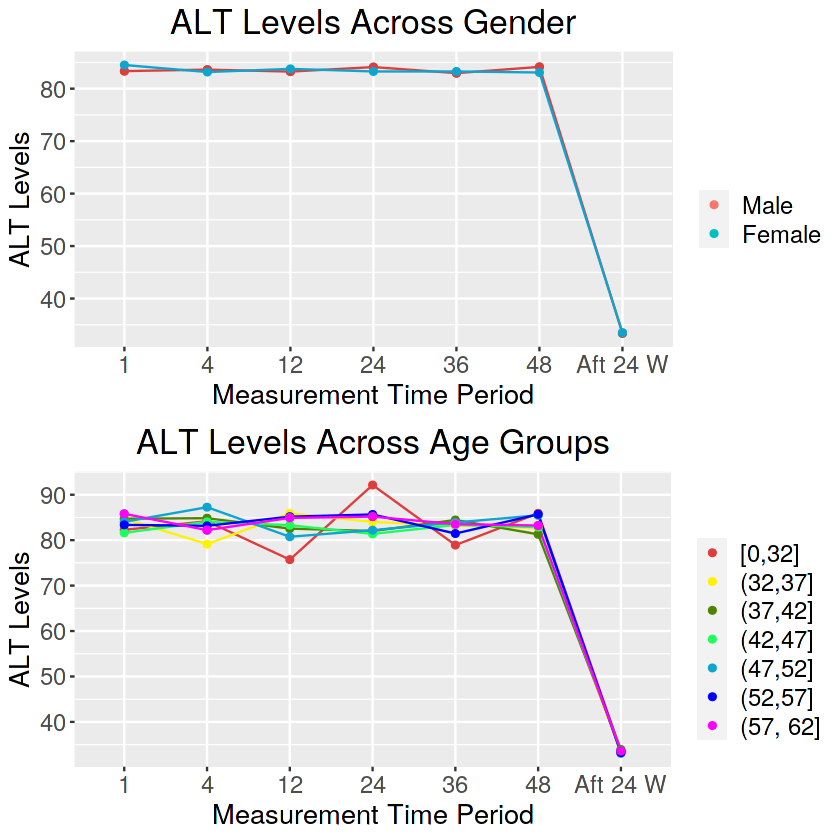

In [12]:
# Plot for ALT Levels Across Gender
plt_gndr <- ggplot(gndr_alt, aes(x=time)) +
    geom_line(aes(y=MaleMeanALT, group=1), color=color_list[1]) +
    geom_line(aes(y=FemaleMeanALT, group=2), color=color_list[5]) +
    geom_point(aes(y=MaleMeanALT, color=time, group=3)) +
    scale_color_discrete(name="", limits=c("Male", "Female")) +
    geom_point(aes(y=MaleMeanALT, group=3), color=color_list[1]) +
    geom_point(aes(y=FemaleMeanALT, group=2), color=color_list[5]) +
    ggtitle("ALT Levels Across Gender") +
    xlab("Measurement Time Period") +
    ylab("ALT Levels") +
    scale_x_discrete(limits=c("1", "4", "12", "24", "36", "48", "After 24 Weeks"), labels=c("1", "4", "12", "24", "36", "48", "Aft 24 W")) +
    my_theme

# Plot for ALT Levels Across Age Groups
plt_age <- ggplot(age_alt, aes(x=time)) +
    geom_line(aes(y=age_alt[,2], group=1), color=color_list[1]) +
    geom_line(aes(y=age_alt[,3], group=1), color=color_list[2]) +
    geom_line(aes(y=age_alt[,4], group=1), color=color_list[3]) +
    geom_line(aes(y=age_alt[,5], group=1), color=color_list[4]) +
    geom_line(aes(y=age_alt[,6], group=1), color=color_list[5]) +
    geom_line(aes(y=age_alt[,7], group=1), color=color_list[6]) +
    geom_line(aes(y=age_alt[,8], group=1), color=color_list[7]) +
    geom_point(aes(y=age_alt[,2], group=1), color=color_list[1]) +
    geom_point(aes(y=age_alt[,3], group=1), color=color_list[2]) +
    geom_point(aes(y=age_alt[,4], group=1), color=color_list[3]) +
    geom_point(aes(y=age_alt[,5], group=1), color=color_list[4]) +
    geom_point(aes(y=age_alt[,6], group=1), color=color_list[5]) +
    geom_point(aes(y=age_alt[,7], group=1), color=color_list[6]) +
    geom_point(aes(y=age_alt[,8], group=1, color=color_list)) +
    scale_color_manual(name="", labels=c("[0,32]", "(32,37]", "(37,42]", "(42,47]", "(47,52]", "(52,57]", "(57, 62]"), values=color_list) +
    geom_point(aes(y=age_alt[,8], group=1), color=color_list[7]) +
    scale_x_discrete(limits=c("1", "4", "12", "24", "36", "48", "After 24 Weeks"), labels=c("1", "4", "12", "24", "36", "48", "Aft 24 W")) +
    ggtitle("ALT Levels Across Age Groups") +
    xlab("Measurement Time Period") +
    ylab("ALT Levels") +
    my_theme

grid.arrange(plt_gndr, plt_age, nrow=2)

<h3>Analyses:-</h3>
* **ALT(Alanine Aminotransferase) Test**<br> The alanine aminotransferase (ALT) test is a blood test that checks for liver damage. *Higher levels* of ALT indicate *Greater Liver Damage* (reference:- https://www.webmd.com/a-to-z-guides/alanine-aminotransferase-test#1)
* **Across Gender**<br> Although there is not much variance between Male and Female ALT (mean) levels, both of them do *drop after 24 Weeks* showing *improvement in Liver Conditions* for both
* **Across Age**<br> Though there is variation in ALT (mean) levels amongst different age groups, all of them follow a *general trend* and *drop* together after 24 Weeks also showing *improvement in Liver conditions*